In [142]:
#for pandas
import pandas as pd

In [143]:
#for numpy
import numpy as np

In [144]:
#for plotting purpose
import matplotlib.pyplot as plt

In [145]:
import seaborn as sns

In [146]:
def feature_normalize_own(x):
    m=x.shape[0]
    mu=(1/m)*np.sum(x,axis=0)
    sig=np.std(x,axis=0,ddof=1)
    mu[0]=0
    sig[0]=1
    x=(x-mu)/sig
    return x,mu,sig

In [147]:
def feature_normalize_other(x,mu,sig):
    x=(x-mu)/sig
    return x

In [148]:
def compute_cost(theta,x,y,lambo=0):
    m=x.shape[0]
    hey=((x.dot(theta))-y)**2
    heyu=(1/(2*m))*np.sum(hey)
    heyu=heyu+(lambo/(2*m))*(np.sum(theta*theta))
    return heyu

In [149]:
def compute_grad(theta,x,y,lambo=0):
    m=x.shape[0]
    hey=((x.dot(theta))-y)
    heyu=(1/m)*((np.transpose(x)).dot(hey))
    heyu=heyu+(lambo/m)*(theta)
    return heyu

In [150]:
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/House Sales in King County, USA/kc_house_data.csv"

In [151]:
data=pd.read_csv(datafileloc,header=0)

In [152]:
print(data.shape)

(21613, 21)


In [153]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [154]:
#checking presence of null or NAN values

In [155]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [156]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [157]:
#clearly no nan values...data set is continuous throughout

In [158]:
#here we will convert date to a number, as we expect prices to increase as we move forward in time 
#with other features kept as constant

In [159]:
print(data["date"].iloc[0])

20141013T000000


In [160]:
datewf=np.zeros(21613)
for i in range(0,21613):
    hey=str(data["date"].iloc[i])
    hey=float(hey[2:8])/10000
    datewf[i]=hey

In [161]:
#checking if task done correctly
print(datewf[0])
print(datewf[21612])

14.1013
14.1015


In [162]:
#insert this column to data
data.insert(3,'modified_date',datewf.reshape(-1,1))

In [163]:
data.head()

,id,date,price,modified_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,14.1013,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,14.1209,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,15.0225,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,14.1209,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,15.0218,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [164]:
venom=data.columns.values
for i in range(0,len(venom)):
    print("%d  %s"%(i,venom[i]))

0  id
1  date
2  price
3  modified_date
4  bedrooms
5  bathrooms
6  sqft_living
7  sqft_lot
8  floors
9  waterfront
10  view
11  condition
12  grade
13  sqft_above
14  sqft_basement
15  yr_built
16  yr_renovated
17  zipcode
18  lat
19  long
20  sqft_living15
21  sqft_lot15


In [165]:
#now we will randomly shuffle data row-wise 

In [166]:
hey=np.arange(0,21613,1)
np.random.shuffle(hey)

In [167]:
data=data.iloc[hey,:]
data=data.reset_index(drop=True)

In [168]:
data.head()

,id,date,price,modified_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5100402782,20141020T000000,511000.0,14.1020,2,1.00,1250,5413,1.0,0,...,7,1250,0,1923,0,98115,47.6945,-122.315,1250,5413
1,4389200753,20140819T000000,1565000.0,14.0819,4,2.75,2810,8570,2.0,0,...,10,2810,0,1993,0,98004,47.6159,-122.211,2810,9621
2,1219000120,20150402T000000,340000.0,15.0402,4,1.00,1140,13440,1.0,0,...,5,1140,0,1944,0,98166,47.4619,-122.344,1450,7560
3,3949600090,20141201T000000,335000.0,14.1201,3,1.00,980,9903,1.0,0,...,7,980,0,1966,0,98028,47.7746,-122.239,1830,9903
4,7853301700,20150420T000000,635000.0,15.0420,5,2.75,3110,6621,2.0,0,...,9,3110,0,2006,0,98065,47.5430,-121.888,3550,7953


In [169]:
data.dtypes

id                 int64
date              object
price            float64
modified_date    float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [170]:
#converting everting to float type
data.iloc[:,2:]=data.iloc[:,2:].astype(float)

In [171]:
data.dtypes

id                 int64
date              object
price            float64
modified_date    float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [172]:
#now we will divide data into 3 categories "Training"(~60%) , "Validation"(~20%) and "Testing"(~20%)
#say 13000 examples in training
#say 4500 examples in validation
#and rest 4113 examples in testing

In [173]:
data.shape

(21613, 22)

In [174]:
listy=[i for i in range(3,22)]
xtrain=np.array(data.iloc[:13000,listy])
ytrain=np.array(data.iloc[:13000,2]).reshape(-1,1)
print(xtrain.shape,ytrain.shape)

xval=np.array(data.iloc[13000:17500,listy])
yval=np.array(data.iloc[13000:17500,2]).reshape(-1,1)
print(xval.shape,yval.shape)

xtest=np.array(data.iloc[17500:,listy])
ytest=np.array(data.iloc[17500:,2]).reshape(-1,1)
print(xtest.shape,ytest.shape)

(13000, 19) (13000, 1)
(4500, 19) (4500, 1)
(4113, 19) (4113, 1)


In [175]:
#adding biased column of ones
xtrain=np.hstack((np.ones(xtrain.shape[0]).reshape(-1,1),xtrain))
xval=np.hstack((np.ones(xval.shape[0]).reshape(-1,1),xval))
xtest=np.hstack((np.ones(xtest.shape[0]).reshape(-1,1),xtest))
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(13000, 20)
(4500, 20)
(4113, 20)


Now checking effect of zipcode on price...though obviously we cannot se the isolated effect of zipcode on price as other features are there to..but a rough estimate of zipcodes cluster 

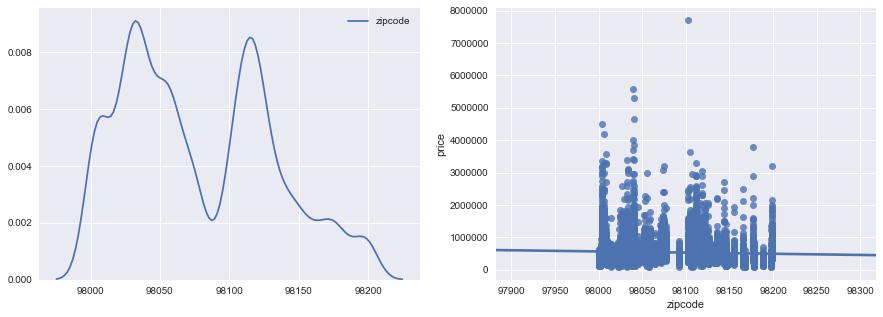

In [176]:
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(data.iloc[:13000,17])
plt.subplot(1,2,2)
sns.regplot(data.iloc[:13000,17],data.iloc[:13000,2],fit_reg=True)

There's no specific pattern which can be observed
Also one point can be made as we can clearly see that envelope curve of populatin density in 1st graph is more or less in same shape as that of envelope curve of 2nd plot
So clearly no effect
so we can drop zipcode column

In [177]:
xtrain=np.delete(xtrain,15,1)
xval=np.delete(xval,15,1)
xtest=np.delete(xtest,15,1)
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(13000, 19)
(4500, 19)
(4113, 19)


now performing feature normalization

In [ ]:
xtrain,mu,sig=featurenormalize(xtrain)

In [ ]:
#now using gradient descent algorithm

In [ ]:
theta=np.zeros((xtrain.shape[1],1))
print(theta.shape)

In [ ]:
iterations=4000
alpha=0.01
ite=[i for i in range(0,iterations+1)]

In [ ]:
J_val_train=[compute_cost(theta,xtrain,ytrain)]

In [ ]:
for i in range(0,iterations):
    theta=theta-(alpha)*(compute_grad(theta,xtrain,ytrain))
    J_val_train.append(compute_cost(theta,xtrain,ytrain))

In [ ]:
plt.plot(ite,J_val_train,c='b')
plt.xlabel("No. of iterations")
plt.ylabel("Error (In Sample)")

In [ ]:
plt.plot(ite[:500],J_val_train[:500],c='b')
plt.xlabel("No. of iterations")
plt.ylabel("Error (In Sample)")

In [ ]:
plt.plot(ite[100:200],J_val_train[100:200],c='b')
plt.xlabel("No. of iterations")
plt.ylabel("Error (In Sample)")


In [ ]:
print(J_val_train[4000])

In [ ]:
#now let us try different things to reduce error 

In [ ]:
#first let us plot learning curves

In [ ]:
iterations=500
alpha=0.01
J_val_train=[]
J_val_val=[]

In [ ]:
for m in np.arange(1,3,1):
    theta=np.zeros((x.shape[1],1))
    xtm=xtrain[0:2,:]
    xtm,mutm,sigtm=featurenormalize(xtm)
    print(mutm)
    #for i in range(0,iterations):
    #    theta=theta-alpha*(compute_grad(theta,xtm,ytrain[0:m]))
    #J_val_train.append(compute_cost(theta,xtm,ytrain[0:m]))
    #J_val_val.append(compute_cost(theta,((xval-mutm)/sigtm),yval))